# Template Notebook

## Setup

### Standard library imports

In [20]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import sys
import warnings
import logging

sys.path.append('../..')
warnings.filterwarnings('ignore')
logger = logging.getLogger(__name__)

### Imports 

In [118]:
%autoreload 2

from itertools import product

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from sklearn import metrics
from sklearn import covariance
from tqdm import tqdm

from source.generators.rejection import 
from source.estimators.evaluate import evaluate_estimate
from source.estimators.stats import (
    estimate_expectation,
    estimate_variance,
    estimate_covariance,
    estimate_correlation,
)

In [69]:
sns.set()

In [16]:
n_samples = [10, 100, 1000, 10_000]
distributions = {"normal": stats.norm,
                 "exponential": stats.expon,
                 "cauchy": stats.cauchy}

In [114]:
results = []
for samples, distribution in tqdm(product(n_samples, distributions.keys())):
    error = evaluate_estimate(
        estimator=estimate_expectation,
        distribution=distributions[distribution],
        true_value=distributions[distribution].expect(),
        n_samples=samples,
        n_trials=1000,
        silent=True,
        metric="mse",
    )
    results.append([distribution, samples, error])

12it [00:03,  2.36it/s]


In [28]:
pd.DataFrame.from_records(results, columns=["distribution", "n_samples", "error_value"])

,distribution,n_samples,error_value
0,normal,10,1.039358e-01
1,exponential,10,9.749172e-02
2,cauchy,10,9.391161e+02
3,normal,100,1.010307e-02
4,exponential,100,1.029003e-02
5,cauchy,100,8.595124e+01
6,normal,1000,9.711193e-04
7,exponential,1000,1.019681e-03
8,cauchy,1000,3.015860e+03
9,normal,10000,1.005736e-04


In [102]:
distributions = {"normal": stats.norm,
                 "exponential": stats.expon,
                 "laplace": stats.laplace}

bias = [True, False]

In [107]:
results = []
for samples, distribution in tqdm(product(n_samples, distributions.keys())):
    error = evaluate_estimate(
        estimator=estimate_variance,
        distribution=distributions[distribution],
        true_value=distributions[distribution].var(),
        n_samples=samples,
        n_trials=1000,
        silent=True,
        metric="mse",
    )
    results.append([distribution, samples, error])

12it [00:05,  1.15it/s]


In [109]:
pd.DataFrame.from_records(results, columns=["distribution", "n_samples", "error_value"])

,distribution,n_samples,error_value
0,normal,10,0.233945
1,exponential,10,0.722981
2,laplace,10,2.134262
3,normal,100,0.020608
4,exponential,100,0.089379
5,laplace,100,0.187060
6,normal,1000,0.002047
7,exponential,1000,0.008027
8,laplace,1000,0.019773
9,normal,10000,0.000218


In [59]:
estimate_variance(stats.norm.rvs(size=1000), biased=True)

1.0277015781868277

In [97]:
values = []
values_biased = []
for samples in tqdm(np.linspace(10, 1000, 10)):
    values.append(estimate_variance(stats.norm.rvs(size=1000)))
    values_biased.append(estimate_variance(stats.norm.rvs(size=1000), biased=True))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 1998.43it/s]


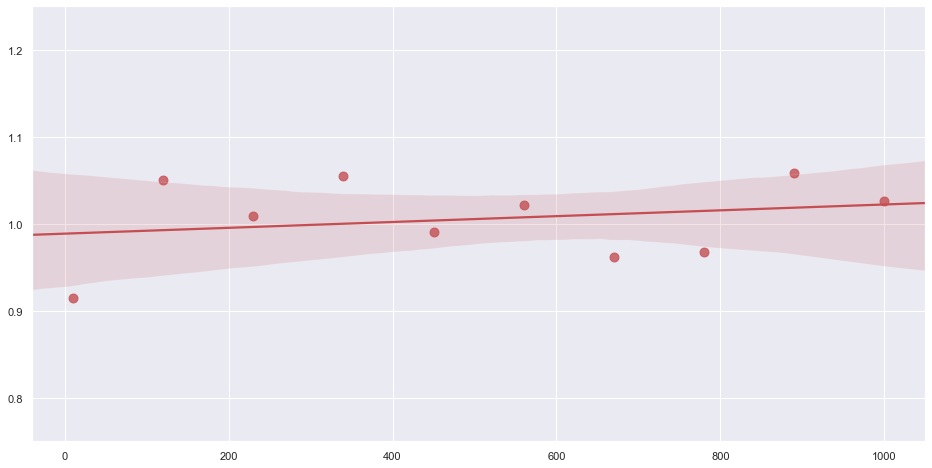

In [101]:
figure = plt.figure(figsize=[16, 8])

# sns.regplot(np.linspace(10, 1000, 10), values, order=1, scatter_kws={"s": 80})
sns.regplot(np.linspace(10, 1000, 10), values_biased, order=1, scatter_kws={"s": 80}, color="r")
_ = plt.ylim([0.75, 1.25])
plt.savefig("../../images/estimates/variance_reg_with_bias.png")

In [116]:
results = []
for samples, distribution in tqdm(product(n_samples, distributions.keys())):
    error = evaluate_estimate(
        estimator=estimate_variance,
        distribution=distributions[distribution],
        true_value=distributions[distribution].var(),
        n_samples=samples,
        n_trials=1000,
        silent=True,
        metric="mse",
    )
    results.append([distribution, samples, error])

12it [00:05,  1.16it/s]


In [117]:
pd.DataFrame.from_records(results, columns=["distribution", "n_samples", "error_value"])

,distribution,n_samples,error_value
0,normal,10,0.190318
1,exponential,10,0.653938
2,laplace,10,1.634741
3,normal,100,0.019721
4,exponential,100,0.084854
5,laplace,100,0.203962
6,normal,1000,0.002040
7,exponential,1000,0.007414
8,laplace,1000,0.018635
9,normal,10000,0.000199


In [120]:
cauchy_variance = []
for _ in range(100):
    cauchy_variance.append(estimate_variance(stats.cauchy.rvs(size=1000)))

In [125]:
cauchy_variance = np.array(cauchy_variance)
print(f"{cauchy_variance.mean()}")
print(f"{cauchy_variance.min()}")
print(f"{cauchy_variance.max()}")
print(f"{np.std(cauchy_variance)}")

107767.65578872955
71.52392924586856
3708497.927826696
493598.78166415653


### Covariance

In [132]:
X1 = np.random.rand(1000)
X2 = 10 * X1

In [142]:
cov = []
for _ in range(1000):
    cov.append(estimate_covariance(stats.norm.rvs(size=1000), stats.norm.rvs(size=1000)))
    
np.array(cov).mean()

0.0004020597693588694

In [134]:
estimate_covariance(X1, X2)

0.8192555432441715

In [145]:
for a, b in [(1, 0), (10, 0), (1, 10), (10, 10), (-1, 0), (-10, 0), (-1, 10), (-10, -10)]:
    X1 = np.random.rand(1000)
    X2 = a * X1 + b
    print(f"a = {a}, b = {b} \nCov(X, Y) = {estimate_covariance(X1, X2)}", end="\n\n")

a = 1, b = 0 
Cov(X, Y) = 0.08511228815671562

a = 10, b = 0 
Cov(X, Y) = 0.788856750214173

a = 1, b = 10 
Cov(X, Y) = 0.08401498333688107

a = 10, b = 10 
Cov(X, Y) = 0.8043440502115322

a = -1, b = 0 
Cov(X, Y) = -0.08411018988025501

a = -10, b = 0 
Cov(X, Y) = -0.8417273453675049

a = -1, b = 10 
Cov(X, Y) = -0.0837090439440571

a = -10, b = -10 
Cov(X, Y) = -0.8233225449569694



In [148]:
cov = []
for a in np.linspace(0, 10, 1000):
    X1 = np.random.rand(1000)
    cov.append(estimate_covariance(X1, a*X1))

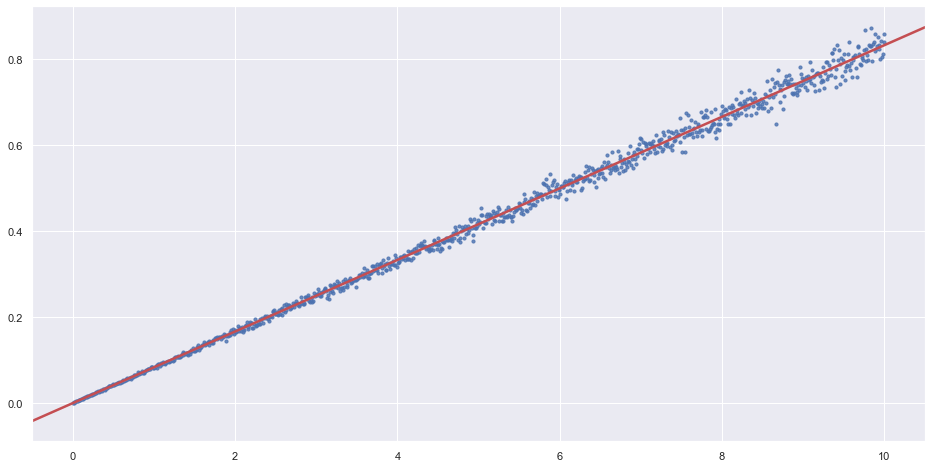

In [163]:
figure = plt.figure(figsize=[16, 8])

_ = sns.regplot(np.linspace(0, 10, 1000), cov, scatter_kws={"s": 10}, line_kws={"color": "r", "linewidth": 2.5})

plt.savefig("../../images/estimates/covarriance.png")

### Correlation

In [194]:
# X1 = np.random.rand(1000)
X1 = stats.norm.rvs(size=1000)
X2 = np.power(X1, 2)

In [195]:
estimate_correlation(X1, X2)

-0.04111359982774698

In [197]:
for X1 in (np.random.rand(1000), stats.norm.rvs(size=1000), stats.expon.rvs(size=1000)):
    X2 = np.sin(X1)
    print(estimate_correlation(X1, X2))

0.997364302693418
0.9375000050292364
0.06957309624388726
